### IMPORT LIBRARIES

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')

#folium
import folium
#plotly
import plotly.express as px
import plotly.figure_factory as ff




### LOAD DATA

In [8]:
kaggle_path='/home/ibab/Applications/Jupyter/Kaggle Competition'

#WEEK2 DATA
tw2=pd.read_csv(kaggle_path+"/Week2/train.csv")
test_week2=pd.read_csv(kaggle_path+"/Week2/test.csv")

#Population 2020
population=pd.read_csv(kaggle_path+"/Population_2020.csv")

#INDIA
india=pd.read_csv(kaggle_path+"/india.csv")

#WEATHER
weather=pd.read_csv(kaggle_path+"/weather.csv")



### DATA CLEANING

In [10]:
#TW2.............................
tw2=tw2.rename(columns={"Province_State":"Province","Country_Region":"Country","ConfirmedCases":"Confirmed"})
tw2["Province"]=tw2["Province"].fillna('')

#WEATHER DATA...........................
weather=weather.drop(columns=["Unnamed: 0","Confirmed","Fatalities","capital","Province","Id"])
weather["humidity"]=weather["humidity"].fillna(0)
weather["sunHour"]=weather["sunHour"].fillna(0)
weather["tempC"]=weather["tempC"].fillna(0)
weather["windspeedKmph"]=weather["windspeedKmph"].fillna(0)



#POPULATION
population=population.drop('Unnamed: 0',axis=1)
population["fertility"]=population["fertility"].fillna(0)
population["age"]=population["age"].fillna(0)
population["urban_percentage"]=population["urban_percentage"].fillna(0)



### CREATING DATA

#### MERGING TW2 AND WEATHER DATA

In [13]:
data=pd.merge(tw2,weather,on=["Country","Date"],how="inner")


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277858 entries, 0 to 277857
Data columns (total 12 columns):
Id               277858 non-null int64
Province         277858 non-null object
Country          277858 non-null object
Date             277858 non-null object
Confirmed        277858 non-null float64
Fatalities       277858 non-null float64
Lat              277858 non-null float64
Long             277858 non-null float64
humidity         277858 non-null float64
sunHour          277858 non-null float64
tempC            277858 non-null float64
windspeedKmph    277858 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 27.6+ MB


#### MERGING DATA AND POPULATION

In [15]:
data=pd.merge(data,population,on=["Country"],how="inner")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277858 entries, 0 to 277857
Data columns (total 17 columns):
Id                  277858 non-null int64
Province            277858 non-null object
Country             277858 non-null object
Date                277858 non-null object
Confirmed           277858 non-null float64
Fatalities          277858 non-null float64
Lat                 277858 non-null float64
Long                277858 non-null float64
humidity            277858 non-null float64
sunHour             277858 non-null float64
tempC               277858 non-null float64
windspeedKmph       277858 non-null float64
Population          277858 non-null int64
density             277858 non-null int64
fertility           277858 non-null float64
age                 277858 non-null float64
urban_percentage    277858 non-null float64
dtypes: float64(11), int64(3), object(3)
memory usage: 38.2+ MB


In [17]:
#CHANGING FLOAT TO INT
data["Confirmed"]=data["Confirmed"].astype(int)
data["Fatalities"]=data["Fatalities"].astype(int)

#CONVERTING DATE OBJECT TO DATETIME FORMAT

data["Date"]=pd.to_datetime(data["Date"])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277858 entries, 0 to 277857
Data columns (total 17 columns):
Id                  277858 non-null int64
Province            277858 non-null object
Country             277858 non-null object
Date                277858 non-null datetime64[ns]
Confirmed           277858 non-null int64
Fatalities          277858 non-null int64
Lat                 277858 non-null float64
Long                277858 non-null float64
humidity            277858 non-null float64
sunHour             277858 non-null float64
tempC               277858 non-null float64
windspeedKmph       277858 non-null float64
Population          277858 non-null int64
density             277858 non-null int64
fertility           277858 non-null float64
age                 277858 non-null float64
urban_percentage    277858 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(5), object(2)
memory usage: 38.2+ MB


In [19]:
data.shape

(277858, 17)

In [20]:
data["Date"].min(),data["Date"].max()

(Timestamp('2020-01-22 00:00:00'), Timestamp('2020-03-21 00:00:00'))

In [67]:
data.head()

Id Province      Country       Date  Confirmed  Fatalities   Lat  Long  \
0   1           Afghanistan 2020-01-22          0           0  33.0  65.0   
1   2           Afghanistan 2020-01-23          0           0  33.0  65.0   
2   3           Afghanistan 2020-01-24          0           0  33.0  65.0   
3   4           Afghanistan 2020-01-25          0           0  33.0  65.0   
4   5           Afghanistan 2020-01-26          0           0  33.0  65.0   

   humidity  sunHour  tempC  windspeedKmph  Population  density  fertility  \
0      65.0      8.7   -1.0            8.0    38928346       60        4.6   
1      59.0      8.7   -3.0            8.0    38928346       60        4.6   
2      71.0      7.1    0.0            7.0    38928346       60        4.6   
3      79.0      8.7    0.0            7.0    38928346       60        4.6   
4      64.0      8.7   -1.0            8.0    38928346       60        4.6   

    age  urban_percentage  
0  18.0              0.25  
1  18.0              0.25  
2  18.0              0.25  
3  18.0              0.25  
4  18.0              0.25

In [82]:
data_latest=data[data["Date"]==max(data["Date"])].reset_index()
data_latest=data_latest.drop(['index','Id'],axis=1)

data_grouped=data.groupby(["Province","Country","Date"])["Confirmed",
                                                         "Fatalities",
                                                        "Lat","Long","humidity","sunHour","tempC",
                                                        "windspeedKmph","Population",
                                                        "density","fertility","age",
                                                        "urban_percentage"].agg({"Confirmed":"sum",
                                                                                "Fatalities":"sum",
                                                                                "Lat":"mean",
                                                                                "Long":"mean",
                                                                                "humidity":"mean",
                                                                                "sunHour":"mean",
                                                                                "tempC":"mean",
                                                                                "windspeedKmph":"mean",
                                                                                "Population":"mean",
                                                                                "density":"mean",
                                                                                "fertility":"mean",
                                                                                "age":"mean",
                                                                                "urban_percentage":"mean"}).reset_index()

data_grouped["Date"]=data_grouped["Date"].dt.strftime("%m/%d/%Y")

data_latest_grouped=data_latest.groupby(["Country"])["Confirmed","Fatalities","Population","Lat","Long"].agg({"Confirmed":"sum",
                                                                                                 "Fatalities":"sum",
                                                                                                 "Population":"mean",
                                                                                                 "Lat":"mean","Long":"mean"}).reset_index()

In [115]:
gdf=data.groupby(["Country"])["Confirmed",
                             "Fatalities",
                            "Lat","Long","humidity","sunHour","tempC",
                            "windspeedKmph","Population",
                            "density","fertility","age",
                            "urban_percentage"].agg({"Confirmed":"sum",
                                                    "Fatalities":"sum",
                                                    "Lat":"mean",
                                                    "Long":"mean",
                                                    "humidity":"mean",
                                                    "sunHour":"mean",
                                                    "tempC":"mean",
                                                    "windspeedKmph":"mean",
                                                    "Population":"mean",
                                                    "density":"mean",
                                                    "fertility":"mean",
                                                    "age":"mean",
                                                    "urban_percentage":"mean"}).reset_index()

In [83]:
data_latest.head()

Province      Country       Date  Confirmed  Fatalities      Lat     Long  \
0           Afghanistan 2020-03-21         24           0  33.0000  65.0000   
1               Albania 2020-03-21         76           2  41.1533  20.1683   
2               Algeria 2020-03-21        139          15  28.0339   1.6596   
3               Andorra 2020-03-21         88           0  42.5063   1.5218   
4             Argentina 2020-03-21        158           4 -38.4161 -63.6167   

   humidity  sunHour  tempC  windspeedKmph  Population  density  fertility  \
0      61.0      9.2   15.0            5.0    38928346       60        4.6   
1      63.0     11.6   19.0            5.0     2877797      105        1.6   
2      80.0      7.6   17.0           11.0    43851044       18        3.1   
3      68.0     11.6   10.0            5.0       77265      164        0.0   
4      36.0     11.6   32.0            7.0    45195774       17        2.3   

    age  urban_percentage  
0  18.0              0.25  
1  36.0              0.63  
2  29.0              0.73  
3   0.0              0.88  
4  32.0              0.93

In [84]:
data_grouped.head()

Province      Country        Date  Confirmed  Fatalities   Lat  Long  \
0           Afghanistan  01/22/2020          0           0  33.0  65.0   
1           Afghanistan  01/23/2020          0           0  33.0  65.0   
2           Afghanistan  01/24/2020          0           0  33.0  65.0   
3           Afghanistan  01/25/2020          0           0  33.0  65.0   
4           Afghanistan  01/26/2020          0           0  33.0  65.0   

   humidity  sunHour  tempC  windspeedKmph  Population  density  fertility  \
0      65.0      8.7   -1.0            8.0    38928346       60        4.6   
1      59.0      8.7   -3.0            8.0    38928346       60        4.6   
2      71.0      7.1    0.0            7.0    38928346       60        4.6   
3      79.0      8.7    0.0            7.0    38928346       60        4.6   
4      64.0      8.7   -1.0            8.0    38928346       60        4.6   

    age  urban_percentage  
0  18.0              0.25  
1  18.0              0.25  
2  18.0              0.25  
3  18.0              0.25  
4  18.0              0.25

In [85]:
data_latest_grouped.head()

Country  Confirmed  Fatalities  Population      Lat     Long
0  Afghanistan         24           0    38928346  33.0000  65.0000
1      Albania         76           2     2877797  41.1533  20.1683
2      Algeria        139          15    43851044  28.0339   1.6596
3      Andorra         88           0       77265  42.5063   1.5218
4    Argentina        158           4    45195774 -38.4161 -63.6167

### The below map shows us spread of coronavirus over time

In [125]:
#SPREAD OVER TIME...........................................

fig=px.scatter_geo(data_grouped,locations="Country",
                  locationmode="country names",
                   color=np.log(data_grouped["Confirmed"]),
                  animation_frame="Date",
                   size=data_grouped["Confirmed"].pow(0.3),
                  projection="natural earth",
                  hover_name="Country",
                  title="Spread of Coronavirus Over time")

fig.show()

## WORLDWIDE CONFIRMED CASES 

In [129]:
#TOTAL CONFIRMED CASES AROUND THE WORLD

fig=px.choropleth(gdf,locations="Country",
                 locationmode="country names",
                 color=np.log(gdf["Confirmed"]),
                  hover_name="Country",
                  hover_data=["Confirmed","Population","tempC","windspeedKmph","humidity","sunHour"],
                  title="Total Confirmed cases around the world")

fig.show()

As expected china will be having most no of confirmed cases
The other countries like USA , France , Italy , Iran are also badly infected

In [102]:
most_con=data_latest_grouped.sort_values(by="Confirmed",ascending=False)[0:10].reset_index(drop=True).style.background_gradient(cmap="Reds")
most_con

In [106]:
fig=px.bar(data_latest_grouped.sort_values(by="Confirmed")[-10:],x="Confirmed",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text='Confirmed',height=800,title="Confirmed Cases")
fig.show()

 As we can see from the table and the figure the most affected countries are china,us,france,italy and so on with china the most affected.
 We can expect USA to have more confirmed cases by start of april.

In [98]:
temp_con=data.groupby(["Country","Date"])["Confirmed","Fatalities"].sum().reset_index()
temp_con["Date"]=temp_con["Date"].dt.strftime("%m/%d/%Y")

In [99]:
temp_con.head()

Country        Date  Confirmed  Fatalities
0  Afghanistan  01/22/2020          0           0
1  Afghanistan  01/23/2020          0           0
2  Afghanistan  01/24/2020          0           0
3  Afghanistan  01/25/2020          0           0
4  Afghanistan  01/26/2020          0           0

In [100]:
#LINE CHART OF CONFIRMED CASES OF EACH COUNTRY

fig=px.line(temp_con,x="Date",y="Confirmed",color="Country",title="Confirmed cases in each country over time")

fig.show()

By mid march ,spread of virus in china shows a flat line,that tells us that china is recovering 
On the other hand , if wee see other countries like US,Italy,France ,we can expect more confirmed cases by april

## WORLDWIDE FATALITIES 

In [130]:
#TOTAL FATALITY CASES AROUND THE WORLD

fig=px.choropleth(gdf,locations="Country",
                 locationmode="country names",
                 color=np.log(gdf["Fatalities"]),
                  hover_name="Country",
                  hover_data=["Fatalities","Population","tempC","windspeedKmph","humidity","sunHour"],
                  title="Total Fatality cases around the world")

fig.show()

The above map shows that china has most death cases ,and then USA ,Italy ,France, Iran have most death cases

### Top 10 countries with most fatality cases 

In [110]:
most_fat=data_latest_grouped.sort_values(by="Fatalities",ascending=False)[0:10].reset_index(drop=True).style.background_gradient(cmap="Reds")
most_fat

China and USA have most death cases ,But Italy has less confirmed cases than france but still more fatality cases than france

In [112]:
#For a better visualization

fig=px.bar(data_latest_grouped.sort_values(by="Fatalities")[-10:],x="Fatalities",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text='Fatalities',height=800,title="Fatality Cases")
fig.show()

In [120]:
#LINE CHART OF CONFIRMED CASES OF EACH COUNTRY

fig=px.line(temp_con,x="Date",y="Fatalities",color="Country",title="Fatality cases in each country over time")

fig.show()

From the above plot, we can expect usa,italy ,iran ,france to have more deaths in coming weeks

If we have look at the latest data , we can have a better understanding of which country is recovering and which one may be more infected in coming weeks

In [122]:
#LATEST CONFIRMED CASES AROUND THE WORLD

fig=px.choropleth(data_latest_grouped,locations="Country",
                 locationmode="country names",
                 color=np.log(data_latest_grouped["Confirmed"]),
                  hover_name="Country",
                  hover_data=["Confirmed","Population"],
                  title="Total Confirmed cases around the world")

fig.show()

In [124]:
#LATEST FATALITY CASES AROUND THE WORLD

fig=px.choropleth(data_latest_grouped,locations="Country",
                 locationmode="country names",
                 color=np.log(data_latest_grouped["Fatalities"]),
                  hover_name="Country",
                  hover_data=["Fatalities","Population"],
                  title="Latest Fatality cases around the world")

fig.show()

By looking at the latest data,confirmed and fatality cases in usa , italy , iran  have increased drastically in few weeks and can expect more in coming weeks.

## Analyzing on few features

### Humidity

As we know from above maps,
the most infected countries have humidity around 30 and 80

In [132]:
fig=px.bar(gdf.sort_values(by='humidity')[-10:],
           x="Confirmed",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text="Confirmed",hover_data=["Confirmed","Fatalities","Population","humidity"],
                                         height=500,title="Highest humidity countries")
fig.show()

Kazakhstan has highest humidity but only 243 confirmed cases,
also Canada has humidity of 88 and also around 67,000 confirmed cases 
So we can't say much looking at the humidity

### Population

In [133]:
fig=px.bar(gdf.sort_values(by='Population')[-10:],
           x="Confirmed",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text="Confirmed",hover_data=["Confirmed","Fatalities","Population"],
                                         height=500,title="Most populated countries")
fig.show()

India with second highest population has around 977 cases and same with US
We can say that countries with more population can have more cases .i.e true as if there are more people chances of virus spreading is more

In [135]:
fig=px.bar(gdf.sort_values(by='Population')[0:10][::-1],
           x="Confirmed",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text="Confirmed",hover_data=["Confirmed","Fatalities","Population"],
                                         height=500,title="Most populated countries")
fig.show()

But thi plot shows that less populated countries like iceland also have more confirmed cases,
So virus does spread in populated countries but also has a chance of spreading in countries wiht less population

### Windspeed

What is expect is that countries that have high windspeed should have more cases ,
As virus can easily spread in such countries

In [138]:
fig=px.bar(gdf.sort_values(by='windspeedKmph')[-10:],
           x="Confirmed",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text="Confirmed",hover_data=["Confirmed","Fatalities","windspeedKmph"],
                                         height=500,title="Countries with high wind speed")
fig.show()

In [140]:
fig=px.bar(gdf.sort_values(by='windspeedKmph')[0:10][::-1],
           x="Confirmed",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text="Confirmed",hover_data=["Confirmed","Fatalities","windspeedKmph"],
                                         height=500,title="Countries with less wind speed")
fig.show()

As we see in both the graphs,countries with high wind speed have confirmed cases but the one's with less wind speed also have more number of confirmed cases

### Temperature

As we saw in above maps,colder countries have higher number of cases.
The same we can expect from the following graphs

In [144]:
fig=px.bar(gdf.sort_values(by='tempC')[-10:],
           x="Confirmed",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text="Confirmed",hover_data=["Confirmed","Fatalities","tempC","Population","windspeedKmph"],
                                         height=500,title="Countries with high temperature")
fig.show()

Among all the hotter countries ,thailand is having around 3000 cases
which can be because of higher population 

Now we'll have a look at the colder countries

In [150]:
fig=px.bar(gdf.sort_values(by='tempC')[0:20][::-1],
           x="Confirmed",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text="Confirmed",hover_data=["Confirmed","Fatalities","tempC","Population","windspeedKmph"],
                                         height=800,title="Countries with low temperature")
fig.show()

As we can see in a list of colder countries ,some have higher number of cases, but not all as expected
Hence we can't say that countries with low temperature will have higher chance of more confirmed cases


### Hours of sunlight

We expect that countries that have higher hours of sunlight,people interactions which can lead to increase in spreading of virus

In [152]:
fig=px.bar(gdf.sort_values(by='sunHour')[-20:],
           x="Confirmed",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text="Confirmed",hover_data=["Confirmed","Fatalities","tempC","Population","windspeedKmph","sunHour"],
                                         height=800,title="Countries with more hours of sunlight")
fig.show()

So, countries with more hours of sunlight have higher chances of increased spreading of virus

Lets look at the countries with less hours of sunlight

In [153]:
fig=px.bar(gdf.sort_values(by='sunHour')[0:20][::-1],
           x="Confirmed",y="Country",
          color_discrete_sequence=['dark cyan'],orientation='h',
           text="Confirmed",hover_data=["Confirmed","Fatalities","tempC","Population","windspeedKmph","sunHour"],
                                         height=800,title="Countries with more hours of sunlight")
fig.show()

Only germany, france ,netherlands and few other countries have higher number of confirmed cases which can also be due to other factors

## MODEL...........................................................

### CREATING TRAINING DATA

In [26]:
#We have training data as (data) dataset
#We'll split this data into training and evaluating datasets

#For that we need to drop some columns and create a train_data dataset

train_data=data.drop(columns=["Id","Province","Country","Date","Lat","Long"],axis=1)

In [27]:
train_data.head()

Confirmed  Fatalities  humidity  sunHour  tempC  windspeedKmph  Population  \
0          0           0      65.0      8.7   -1.0            8.0    38928346   
1          0           0      59.0      8.7   -3.0            8.0    38928346   
2          0           0      71.0      7.1    0.0            7.0    38928346   
3          0           0      79.0      8.7    0.0            7.0    38928346   
4          0           0      64.0      8.7   -1.0            8.0    38928346   

   density  fertility   age  urban_percentage  
0       60        4.6  18.0              0.25  
1       60        4.6  18.0              0.25  
2       60        4.6  18.0              0.25  
3       60        4.6  18.0              0.25  
4       60        4.6  18.0              0.25

### CREATING X AND y FROM TRAIN DATA

In [28]:
#We'll create X and y 
#X will have all dependent features
#y will have target variables

y=train_data[["Confirmed","Fatalities"]]
X=train_data.drop(columns=["Confirmed","Fatalities"],axis=1)


In [29]:
X.head()

humidity  sunHour  tempC  windspeedKmph  Population  density  fertility  \
0      65.0      8.7   -1.0            8.0    38928346       60        4.6   
1      59.0      8.7   -3.0            8.0    38928346       60        4.6   
2      71.0      7.1    0.0            7.0    38928346       60        4.6   
3      79.0      8.7    0.0            7.0    38928346       60        4.6   
4      64.0      8.7   -1.0            8.0    38928346       60        4.6   

    age  urban_percentage  
0  18.0              0.25  
1  18.0              0.25  
2  18.0              0.25  
3  18.0              0.25  
4  18.0              0.25

In [30]:
y.head()

Confirmed  Fatalities
0          0           0
1          0           0
2          0           0
3          0           0
4          0           0

### SPLITTING X AND y

In [31]:
from sklearn.model_selection import train_test_split as tts

X_train,X_val,y_train,y_val=tts(X,y,test_size=0.2,random_state=42)

In [32]:
#training and testing data are ready
#We'll be using Random Forest Classifier

from sklearn.ensemble import RandomForestRegressor

#Model for predicting Confirmed cases
rf_confirmed=RandomForestRegressor(n_estimators=1000, random_state = 42)
#Model for predicting Fatality cases
rf_fatality=RandomForestRegressor(n_estimators=1000,random_state=42)

#### FITTING ON CONFIRMED CASES

In [33]:
#FITTING CONFIRMED MODEL TO TRAINING DATA
rf_confirmed.fit(X_train,y_train["Confirmed"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [34]:
#PREDICTING ON EVALUATING DATA
result_confirmed=rf_confirmed.predict(X_val)

In [35]:
#Error
from sklearn.metrics import mean_squared_log_error

In [36]:
error_confirmed=np.sqrt(mean_squared_log_error(y_val["Confirmed"],result_confirmed))
print(error_confirmed)

1.5481458953247658


#### FITTING ON FATALITY CASES

In [37]:
rf_fatality.fit(X_train,y_train["Fatalities"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [38]:
result_fatality=rf_fatality.predict(X_val)

In [39]:
#Error
error_fatality=np.sqrt(mean_squared_log_error(y_val["Fatalities"],result_fatality))
print(error_fatality)

1.527660685506419


#### FINAL VALIDATION SCORE

In [40]:
print("Final Validatio score: {}".format(np.mean([error_confirmed,error_fatality])))

Final Validatio score: 1.5379032904155925


### FINAL MODEL FITTING

### MODEL_CONFIRMED AND MODEL_FATALITIES

In [41]:
model_confirmed=rf_confirmed.fit(X,y["Confirmed"])
model_fatalities=rf_fatality.fit(X,y["Fatalities"])

### EXTRACTING FEATURE IMPORTANCES

#### IMP FEATURES FOR CONFIRMED

In [42]:
# Extract feature importances for confirmed
fi_con = pd.DataFrame({'feature': list(X.columns),
                   'importance': model_confirmed.feature_importances_})

In [127]:
fi_con.sort_values(by="importance",ascending=False).reset_index(drop=True)

feature  importance
0        Population    0.640208
1             tempC    0.177951
2     windspeedKmph    0.078133
3          humidity    0.053294
4           sunHour    0.035125
5               age    0.008892
6           density    0.004008
7  urban_percentage    0.001235
8         fertility    0.001153

In [44]:
# Get list of important variables for predicting confirmed cases
importances_confirmed = list(model_confirmed.feature_importances_)

In [45]:
features_list=list(X.columns)

Text(0.5, 1.0, 'Variable Importances for Confirmed cases')

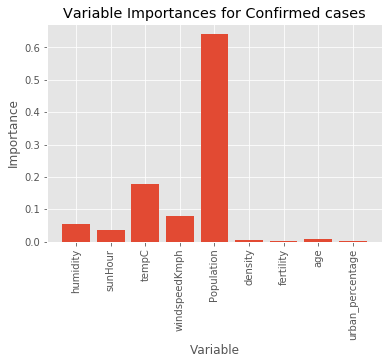

In [46]:
#With data visualization for important variables for confirmed cases

# Set the style
plt.style.use('ggplot')
# list of x locations for plotting
x_values = list(range(len(importances_confirmed)))
# Make a bar chart
plt.bar(x_values, importances_confirmed, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances for Confirmed cases')

#### We can clearly see population,temperature,humidity,windspeed,hours of sunlight are among the important factors that affect number of confirmed cases 

#### More the population ,higher chance of spreading of virus ,same with more hours of sunlight more chances of people interaction. Weather conditions play an important role in spreading of virus

#### IMP FEATURES FOR FATALITIES

In [47]:
# Extract feature importances for fatalities
fi_fatalities = pd.DataFrame({'feature': list(X.columns),
                   'importance': model_fatalities.feature_importances_})

In [128]:
fi_fatalities.sort_values(by="importance",ascending=False).reset_index(drop=True)

feature  importance
0        Population    0.448832
1           sunHour    0.178876
2             tempC    0.156444
3          humidity    0.096530
4     windspeedKmph    0.081833
5               age    0.023973
6           density    0.007082
7         fertility    0.003396
8  urban_percentage    0.003034

In [49]:
# Get a list of important variables for predicting fatality cases
importances_fatalities = list(model_fatalities.feature_importances_)

In [50]:
features_list=list(X.columns)

Text(0.5, 1.0, 'Variable Importances for fatality cases')

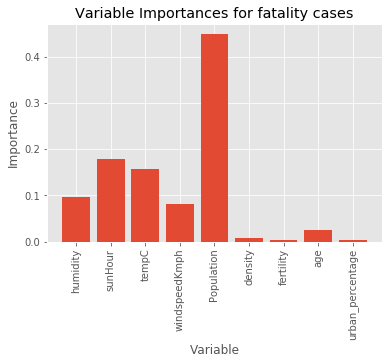

In [51]:
#With data visualization for fatality cases

# Set the style
plt.style.use('ggplot')
# list of x locations for plotting
x_values = list(range(len(importances_fatalities)))
# Make a bar chart
plt.bar(x_values, importances_fatalities, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, features_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances for fatality cases')

#### More population more chances of spreading of virus ,also we can see there is slight importance that age plays in fatality cases.As older people have lesser immunity and higher chance of contracting the disease.Here also the other weather conditions play an important role


### CREATING TESTING DATA

In [ ]:
###########################################################3

In [52]:
test_week2.head()

Id Province      Country        Date
0   1           Afghanistan  2020-03-19
1   2           Afghanistan  2020-03-20
2   3           Afghanistan  2020-03-21
3   4           Afghanistan  2020-03-22
4   5           Afghanistan  2020-03-23

In [53]:
test_week2=test_week2.rename(columns={"ForecastId":"Id","Province_State":"Province","Country_Region":"Country"})
test_week2["Province"]=test_week2["Province"].fillna('')

In [54]:
weather.head()

Country   Lat  Long        Date  humidity  sunHour  tempC  \
0  Afghanistan  33.0  65.0  2020-01-22      65.0      8.7   -1.0   
1  Afghanistan  33.0  65.0  2020-01-23      59.0      8.7   -3.0   
2  Afghanistan  33.0  65.0  2020-01-24      71.0      7.1    0.0   
3  Afghanistan  33.0  65.0  2020-01-25      79.0      8.7    0.0   
4  Afghanistan  33.0  65.0  2020-01-26      64.0      8.7   -1.0   

   windspeedKmph  
0            8.0  
1            8.0  
2            7.0  
3            7.0  
4            8.0

In [55]:
test_week2.head()

Id Province      Country        Date
0   1           Afghanistan  2020-03-19
1   2           Afghanistan  2020-03-20
2   3           Afghanistan  2020-03-21
3   4           Afghanistan  2020-03-22
4   5           Afghanistan  2020-03-23

#### MERGING TEST AND WEATHER DATA

In [56]:
test_df=test_week2.merge(weather,on=["Country","Date"],how='left')
test_df.head()

Id Province      Country        Date   Lat  Long  humidity  sunHour  tempC  \
0   1           Afghanistan  2020-03-19  33.0  65.0      39.0     12.5   17.0   
1   2           Afghanistan  2020-03-20  33.0  65.0      54.0      9.1   13.0   
2   3           Afghanistan  2020-03-21  33.0  65.0      61.0      9.2   15.0   
3   4           Afghanistan  2020-03-22   NaN   NaN       NaN      NaN    NaN   
4   5           Afghanistan  2020-03-23   NaN   NaN       NaN      NaN    NaN   

   windspeedKmph  
0            4.0  
1            5.0  
2            5.0  
3            NaN  
4            NaN

#### MERGING TEST_DF AND POPULATION DATA

In [57]:
test_df=test_df.merge(population,on=["Country"],how="left")
test_df.head()

Id Province      Country        Date   Lat  Long  humidity  sunHour  tempC  \
0   1           Afghanistan  2020-03-19  33.0  65.0      39.0     12.5   17.0   
1   2           Afghanistan  2020-03-20  33.0  65.0      54.0      9.1   13.0   
2   3           Afghanistan  2020-03-21  33.0  65.0      61.0      9.2   15.0   
3   4           Afghanistan  2020-03-22   NaN   NaN       NaN      NaN    NaN   
4   5           Afghanistan  2020-03-23   NaN   NaN       NaN      NaN    NaN   

   windspeedKmph  Population  density  fertility   age  urban_percentage  
0            4.0  38928346.0     60.0        4.6  18.0              0.25  
1            5.0  38928346.0     60.0        4.6  18.0              0.25  
2            5.0  38928346.0     60.0        4.6  18.0              0.25  
3            NaN  38928346.0     60.0        4.6  18.0              0.25  
4            NaN  38928346.0     60.0        4.6  18.0              0.25

In [58]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25782 entries, 0 to 25781
Data columns (total 15 columns):
Id                  25782 non-null int64
Province            25782 non-null object
Country             25782 non-null object
Date                25782 non-null object
Lat                 13891 non-null float64
Long                13891 non-null float64
humidity            13891 non-null float64
sunHour             13891 non-null float64
tempC               13891 non-null float64
windspeedKmph       13891 non-null float64
Population          25481 non-null float64
density             25481 non-null float64
fertility           25481 non-null float64
age                 25481 non-null float64
urban_percentage    25481 non-null float64
dtypes: float64(11), int64(1), object(3)
memory usage: 3.1+ MB


#### CREATING X_TEST FROM TEST_DF

In [61]:
X_test = test_df.set_index("Id").drop(["Lat", "Long", "Date", "Province", "Country"], axis=1).fillna(0)
X_test.head()

humidity  sunHour  tempC  windspeedKmph  Population  density  fertility  \
Id                                                                            
1       39.0     12.5   17.0            4.0  38928346.0     60.0        4.6   
2       54.0      9.1   13.0            5.0  38928346.0     60.0        4.6   
3       61.0      9.2   15.0            5.0  38928346.0     60.0        4.6   
4        0.0      0.0    0.0            0.0  38928346.0     60.0        4.6   
5        0.0      0.0    0.0            0.0  38928346.0     60.0        4.6   

     age  urban_percentage  
Id                          
1   18.0              0.25  
2   18.0              0.25  
3   18.0              0.25  
4   18.0              0.25  
5   18.0              0.25

In [62]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25782 entries, 1 to 12642
Data columns (total 9 columns):
humidity            25782 non-null float64
sunHour             25782 non-null float64
tempC               25782 non-null float64
windspeedKmph       25782 non-null float64
Population          25782 non-null float64
density             25782 non-null float64
fertility           25782 non-null float64
age                 25782 non-null float64
urban_percentage    25782 non-null float64
dtypes: float64(9)
memory usage: 2.0 MB


#### EVALUATING ON TEST DATA

In [63]:
y_pred_confirmed = model_confirmed.predict(X_test)
y_pred_fatalities = model_fatalities.predict(X_test)

In [64]:
len(y_pred_confirmed)

25782

### CREATING SUBMISSION FILE

In [65]:
submission = pd.DataFrame()
submission["ForecastId"]=test_df["Id"]
submission = submission.set_index(['ForecastId'])
submission["Confirmed"] = y_pred_confirmed
submission["Fatalities"] = y_pred_fatalities
submission["Confirmed"]=submission["Confirmed"].astype(int)
submission["Fatalities"]=submission["Fatalities"].astype(int)

submission.head()


Confirmed  Fatalities
ForecastId                       
1                  85           1
2                  20           0
3                  21           0
4                   3           0
5                   3           0

In [154]:
submission.to_csv("submission.csv")